In [1]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import random

In [2]:
#check Company Survey API

company_summary_url = "https://api.census.gov/data/2018/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*"
#business_char_url = "https://api.census.gov/data/2018/abscb?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,QDESC,QDESC_LABEL,BUSCHAR,BUSCHAR_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,FIRMPDEMP_S,FIRMPDEMP_S_F,FIRMPDEMP_PCT_S,FIRMPDEMP_PCT_S_F,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_PCT_S_F&for=us:*"
owner_char_url = "https://api.census.gov/data/2018/abscbo?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_VET,OWNER_VET_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL,YEAR,OWNPDEMP,OWNPDEMP_F,OWNPDEMP_PCT,OWNPDEMP_PCT_F,OWNPDEMP_S,OWNPDEMP_S_F,OWNPDEMP_PCT_S,OWNPDEMP_PCT_S_F&for=us:*"
#tech_char_url = "https://api.census.gov/data/2018/abstcb?get=OWNER_VET_LABEL&for=us:*"
owner_char_url2019 = "https://api.census.gov/data/2019/abscbo?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_VET,OWNER_VET_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL,YEAR,OWNPDEMP,OWNPDEMP_F,OWNPDEMP_PCT,OWNPDEMP_PCT_F,OWNPDEMP_S,OWNPDEMP_S_F,OWNPDEMP_PCT_S,OWNPDEMP_PCT_S_F&for=us:*"
owner_char_url2020 = "https://api.census.gov/data/2020/abscbo?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_VET,OWNER_VET_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL,YEAR,OWNPDEMP,OWNPDEMP_F,OWNPDEMP_PCT,OWNPDEMP_PCT_F,OWNPDEMP_S,OWNPDEMP_S_F,OWNPDEMP_PCT_S,OWNPDEMP_PCT_S_F&for=us:*"



company_response = requests.get(company_summary_url)
#business_char_response = requests.get(business_char_url)
owner_char_response = requests.get(owner_char_url)
owner_char_response2019 = requests.get(owner_char_url2019)
owner_char_response2020 = requests.get(owner_char_url2020)
#tech_char_response = requests.get(tech_char_url)


Convert URL response to json format and insert into the database


In [4]:
company_data = company_response.json()
#business_data = business_char_response.json()
owner_data = owner_char_response.json()
owner_data2019 = owner_char_response2019.json()
owner_data2020 = owner_char_response2020.json()

#tech_data = tech_char_response.json()
company_df = pd.DataFrame(company_data[1:], columns=company_data[0])
#business_df = pd.DataFrame(business_data[1:], columns=business_data[0])
owner_df = pd.DataFrame(owner_data[1:], columns=owner_data[0])
owner_df2019 = pd.DataFrame(owner_data2019[1:], columns=owner_data[0])
owner_df2020 = pd.DataFrame(owner_data2020[1:], columns=owner_data[0])
#tech_df = pd.DataFrame(tech_data[1:], columns=tech_data[0])


KeyError: 'OWNER_VET_LABEL'

DROP Unnecessary columns from the DF

In [5]:
company_df = company_df.drop(['NAME','GEO_ID','NAICS2017','SEX','ETH_GROUP','RACE_GROUP','VET_GROUP','EMPSZFI','FIRMPDEMP_F','RCPPDEMP_F','EMP_F','PAYANN_F','FIRMPDEMP_S_F','RCPPDEMP_S_F','EMP_S_F','PAYANN_S_F','us'],axis=1)
#business_df = business_df.drop(['NAME','GEO_ID','NAICS2017','SEX','ETH_GROUP','RACE_GROUP','VET_GROUP','QDESC','BUSCHAR','FIRMPDEMP_F','FIRMPDEMP_PCT_F','RCPPDEMP_F','RCPPDEMP_PCT_F','EMP_F','EMP_PCT_F','PAYANN_F','PAYANN_PCT_F','FIRMPDEMP_S_F','FIRMPDEMP_PCT_S_F','RCPPDEMP_S_F','RCPPDEMP_PCT_S_F','EMP_S_F','EMP_PCT_S_F','PAYANN_S_F','PAYANN_PCT_S_F','us'],axis=1)
owner_df = owner_df.drop(['GEO_ID','NAICS2017','OWNER_SEX','OWNER_ETH','OWNER_RACE','OWNER_VET','QDESC','OWNCHAR','OWNPDEMP_F','OWNPDEMP_PCT_F','OWNPDEMP_S_F','OWNPDEMP_PCT_S_F','us'],axis=1)
owner_df2019 = owner_df2019.drop(['GEO_ID','NAICS2017','OWNER_SEX','OWNER_ETH','OWNER_RACE','OWNER_VET','QDESC','OWNCHAR','OWNPDEMP_F','OWNPDEMP_PCT_F','OWNPDEMP_S_F','OWNPDEMP_PCT_S_F','us'],axis=1)
owner_df2020 = owner_df2020.drop(['GEO_ID','NAICS2017','OWNER_SEX','OWNER_ETH','OWNER_RACE','OWNER_VET','QDESC','OWNCHAR','OWNPDEMP_F','OWNPDEMP_PCT_F','OWNPDEMP_S_F','OWNPDEMP_PCT_S_F','us'],axis=1)
#tech_df = tech_df.drop(['GEO_ID','NAICS2017','SEX','ETH_GROUP','RACE_GROUP','VET_GROUP','NSFSZFI','FACTORS_P','FIRMPDEMP_F','FIRMPDEMP_PCT_F','RCPPDEMP_F','RCPPDEMP_PCT_F','EMP_F','EMP_PCT_F','PAYANN_F','PAYANN_PCT_F','FIRMPDEMP_S_F','FIRMPDEMP_PCT_S_F','RCPPDEMP_S_F','RCPPDEMP_PCT_S_F','EMP_S_F','EMP_PCT_S_F','PAYANN_S_F','PAYANN_PCT_S_F','us'],axis=1)


Create New DF based off graphing needs

In [7]:
company_vets = company_df[['VET_GROUP_LABEL', 'RCPPDEMP','EMP', 'EMPSZFI_LABEL']]



Seperate Vet/Non-Vet

In [8]:
vet_df = company_vets.loc[company_vets['VET_GROUP_LABEL'] == 'Veteran']
nonvet_df = company_vets.loc[company_vets['VET_GROUP_LABEL'] == 'Nonveteran']

nonvet_df = nonvet_df.drop(['VET_GROUP_LABEL'], axis=1)
vet_df = vet_df.drop(['VET_GROUP_LABEL'], axis=1)


Remove rows from Company DF - Vets


In [9]:
indexStatus = company_vets[(company_vets['VET_GROUP_LABEL'] == 'Classifiable') | (company_vets['VET_GROUP_LABEL'] == 'Unclassifiable' ) | (company_vets['VET_GROUP_LABEL'] == 'Total')].index
company_vets.drop(indexStatus, inplace=True)
company_vets.rename(columns={"VET_GROUP_LABEL": "Owner Status", "EMPSZFI_LABEL": "Firm Size"}, inplace=True)


C:\Users\kendr\AppData\Local\Temp\ipykernel_16620\800223668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_vets.drop(indexStatus, inplace=True)
C:\Users\kendr\AppData\Local\Temp\ipykernel_16620\800223668.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_vets.rename(columns={"VET_GROUP_LABEL": "Owner Status", "EMPSZFI_LABEL": "Firm Size"}, inplace=True)


Violin Chart to Show firm sizes/vet status

In [10]:
fig = px.violin(company_vets, y="Firm Size", x="Owner Status", color="Owner Status") 
fig.show()

Total the respondents for years 2018,2019,2020


In [19]:
owner_df2018 = owner_df.loc[owner_df['OWNER_VET_LABEL'] == 'All owners of respondent firms']
owner_df2018.rename(columns={"OWNER_VET_LABEL": "2018"}, inplace=True)
owner_df2019 = owner_df2019.loc[owner_df2019['OWNER_VET_LABEL'] == 'All owners of respondent firms']
owner_df2019.rename(columns={"OWNER_VET_LABEL": "2019"}, inplace=True)
owner_df2020 = owner_df2020.loc[owner_df2020['OWNER_VET_LABEL'] == 'All owners of respondent firms']
owner_df2020.rename(columns={"OWNER_VET_LABEL": "2020"}, inplace=True)



C:\Users\kendr\AppData\Local\Temp\ipykernel_16620\128906685.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



KeyError: 'OWNER_VET_LABEL'

In [14]:
vet_count2018 = owner_df2018["2018"].value_counts()
vet_count2019 = owner_df2019["2019"].value_counts()
vet_count2020 = owner_df2020["2020"].value_counts()

vet_count2018.rename({'All owners of respondent firms': 'Total Responses', 'Nonveteran': 'Non-Veteran'}, inplace=True)

vet_count2019.rename({'All owners of respondent firms': 'Total Responses', 'Nonveteran': 'Non-Veteran'}, inplace=True)

vet_count2020.rename({'All owners of respondent firms': 'Total Responses', 'Nonveteran': 'Non-Veteran'}, inplace=True)


Concat 2018-2020 into one single dataframe

In [20]:
barchart_df = pd.concat([vet_count2018,vet_count2019, vet_count2020], axis=1)


Text(0.5, 0, 'of Business Owners')

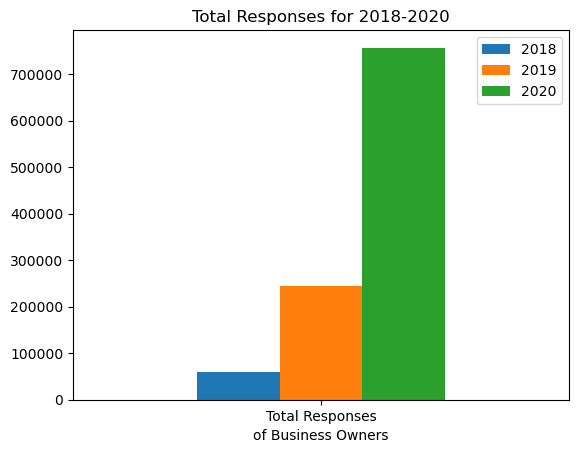

In [18]:

barchart_df.plot(kind="bar")
plt.title("Total Responses for 2018-2020")
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("of Business Owners")

In [206]:

treemap_df = company_df.groupby(['NAICS2017_LABEL','VET_GROUP_LABEL']).size().reset_index(name='count') 
treemap_df = treemap_df.replace('Administrative and support and waste management and remediation services','Administrative <br>and support<br>and waste <br>management<br>and <br>remediation <br>services') 
treemap_df = treemap_df.replace('Professional, scientific, and technical services','Professional,<br>scientific,<br>and technical <br>services') 
treemap_df = treemap_df.replace('Transportation and warehousing','Transportation<br>and warehousing') 
treemap_df = treemap_df.replace('Accommodation and food services','Accommodation<br>and food services') 
treemap_df = treemap_df.replace('Health care and social assistance','Health care<br>and social assistance') 
treemap_df = treemap_df.replace('Real estate and rental and leasing','Real estate<br>and rental <br>and leasing') 
treemap_df = treemap_df.replace('Arts, entertainment, and recreation','Arts, entertainment,<br>and recreation') 
treemap_df = treemap_df.replace('Management of companies and enterprises','Management <br>of companies<br>and enterprises') 
treemap_df = treemap_df.replace('Other services (except public administration)','Other services<br>(except public<br> administration)') 
treemap_df = treemap_df.replace('Mining, quarrying, and oil and gas extraction','Mining, <br>quarrying,<br>and oil <br>and gas extraction') 
treemap_df = treemap_df.replace('Agriculture, forestry, fishing and hunting','Agriculture, <br>forestry,<br>fishing <br>and hunting')
treemap_df = treemap_df.loc[~treemap_df["VET_GROUP_LABEL"].str.contains("Classifiable")] 
treemap_df = treemap_df.loc[~treemap_df["VET_GROUP_LABEL"].str.contains("Unclassifiable")] 
treemap_df = treemap_df.loc[~treemap_df["VET_GROUP_LABEL"].str.contains("Total")] 
treemap_df = treemap_df.loc[~treemap_df["NAICS2017_LABEL"].str.contains('Total for all sectors')]
fig = px.treemap(treemap_df, path=['VET_GROUP_LABEL','NAICS2017_LABEL'],values='count', color = 'count', ) 

fig.show()